<a href="https://colab.research.google.com/github/wilsonfffs/CODING-DOJO/blob/main/Proyecto_2_Parte_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [ ]:
filename = '/content/drive/MyDrive/Coding Dojo /Codigo /week8/BASE DE DATOS CD V2.xlsx'
df = pd.read_excel(filename)
df.head()

,Tipo_Contrato,Sucursal,Servicio,Ultima_Milla,ciudad_Enlace,estado,desPlan,Ancho_Banda,Nodo,valor_Ultima_Milla,...,pers_id_morosidad_cliente,generaciones,tipo_sobrendeudamiento,tiene_tarjeta,val_cupo,tipo_marca_tarjeta,provinciatse,cantontse,antiguedad_bancarizado,Forma_PagoF
0,Cuenta Personal,Quito,ADSL HOME,CNT,Quito,Desactivado,IP Pymes 2009,220-100 Kbps,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AHORROS
1,Cuenta Personal,Quito,ADSL HOME,CNT,Quito,Desactivado,IP Home 2008,128-64 Kbps,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AHORROS
2,Cuenta Personal,Quito,Wifi,Inalambrico,Quito,Desactivado,Dia del Padre 2010,550-550 Kbps,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OTROS
3,Cuenta Personal,Quito,Wifi,Inalambrico,Quito,Activo,WIFI 2020,8000-8000 Kbps,Santa Rosa,0,...,NO,Generacion X,Sin Informacion Endeudamiento,NO,0.0,NO TIENE,PICHINCHA,QUITO,NaN,AHORROS
4,Cuenta Personal,Quito,Wifi,Inalambrico,Quito,Activo,WIFI EMPLEADOS,8000-8000 Kbps,Carapungo,0,...,NO,Baby Boom,Medio Alto Endeudamiento,SI,13800.0,"[MASTERCARD, VISA]",PICHINCHA,QUITO,139.0,OTROS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357579 entries, 0 to 357578
Data columns (total 59 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Tipo_Contrato                 357579 non-null  object 
 1   Sucursal                      357579 non-null  object 
 2   Servicio                      357579 non-null  object 
 3   Ultima_Milla                  357579 non-null  object 
 4   ciudad_Enlace                 357579 non-null  object 
 5   estado                        357579 non-null  object 
 6   desPlan                       357579 non-null  object 
 7   Ancho_Banda                   357579 non-null  object 
 8   Nodo                          213217 non-null  object 
 9   valor_Ultima_Milla            357579 non-null  int64  
 10  valor_Instalacion             357579 non-null  float64
 11  valor_Servicio                357579 non-null  float64
 12  Periodo_Pago                  357579 non-nul

In [ ]:
df1 = df

In [ ]:
 df1.isnull().sum()

Tipo_Contrato                        0
Sucursal                             0
Servicio                             0
Ultima_Milla                         0
ciudad_Enlace                        0
estado                               0
desPlan                              0
Ancho_Banda                          0
Nodo                            144362
valor_Ultima_Milla                   0
valor_Instalacion                    0
valor_Servicio                       0
Periodo_Pago                         0
Forma_Pago                          77
MesVenta                             0
diaVenta                             0
desCanton                       296673
desProvincia                    184001
desParroquia                    302239
Fecha_1ra_Factura                60558
Valor_1ra_Factura                    0
Fecha_Ult_Factura                60558
Valor_Ult_Factura                    0
MesRegistroRequerimiento        154372
MesInstalacion                  243152
longitud                 

In [ ]:
df1.dropna(inplace = True)

In [ ]:
 df1.isnull().sum()

Tipo_Contrato                   0
Sucursal                        0
Servicio                        0
Ultima_Milla                    0
ciudad_Enlace                   0
estado                          0
desPlan                         0
Ancho_Banda                     0
Nodo                            0
valor_Ultima_Milla              0
valor_Instalacion               0
valor_Servicio                  0
Periodo_Pago                    0
Forma_Pago                      0
MesVenta                        0
diaVenta                        0
desCanton                       0
desProvincia                    0
desParroquia                    0
Fecha_1ra_Factura               0
Valor_1ra_Factura               0
Fecha_Ult_Factura               0
Valor_Ult_Factura               0
MesRegistroRequerimiento        0
MesInstalacion                  0
longitud                        0
latitud                         0
segmentacion                    0
esCelerity                      0
permanencia   

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 17 to 357565
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tipo_Contrato                 9861 non-null   object 
 1   Sucursal                      9861 non-null   object 
 2   Servicio                      9861 non-null   object 
 3   Ultima_Milla                  9861 non-null   object 
 4   ciudad_Enlace                 9861 non-null   object 
 5   estado                        9861 non-null   object 
 6   desPlan                       9861 non-null   object 
 7   Ancho_Banda                   9861 non-null   object 
 8   Nodo                          9861 non-null   object 
 9   valor_Ultima_Milla            9861 non-null   int64  
 10  valor_Instalacion             9861 non-null   float64
 11  valor_Servicio                9861 non-null   float64
 12  Periodo_Pago                  9861 non-null   object 
 13  

In [ ]:
df1.head()

,Tipo_Contrato,Sucursal,Servicio,Ultima_Milla,ciudad_Enlace,estado,desPlan,Ancho_Banda,Nodo,valor_Ultima_Milla,...,pers_id_morosidad_cliente,generaciones,tipo_sobrendeudamiento,tiene_tarjeta,val_cupo,tipo_marca_tarjeta,provinciatse,cantontse,antiguedad_bancarizado,Forma_PagoF
17,Cuenta Personal,Quito,Wifi,Inalambrico,Quito,Activo,WIFI 2020 BASICO,8000-8000 Kbps,CriRey,0,...,NO,Millennials,Medio Alto Endeudamiento,SI,4200.0,[VISA],CARCHI,MONTUFAR,113.0,AHORROS
23,Cuenta Personal,Manta,Wifi,Inalambrico,Manta,Activo,WIFI 2020,8000-8000 Kbps,EL Paraiso,0,...,SI,Generacion X,Alto Endeudamiento,NO,0.0,NO TIENE,MANABI,PORTOVIEJO,25.0,AHORROS
28,Cuenta Personal,Manta,Wifi,Inalambrico,Manta,Desactivado,WIFI - 4Q 2016 - INSTALACION 25,3000 - 3000 kbps,10 DE AGOSTO,0,...,NO,Millennials,Medio Endeudamiento,NO,0.0,NO TIENE,MANABI,MANTA,3.0,AHORROS
31,Cuenta Personal,Manta,Wifi,Inalambrico,Portoviejo,Activo,WIFI 2020 BASICO,8000-8000 Kbps,Portoviejo,0,...,SI,Generacion X,Medio Endeudamiento,SI,20000.0,"[DINERS, MASTERCARD, VISA]",MANABI,PORTOVIEJO,119.0,TARJETA
33,Cuenta Personal,Santo Domingo,Wifi,Inalambrico,La Concordia,Activo,WIFI 2018 INST 50 - SEGUNDO SEMESTRE,5000 - 5000 kbps,Villegass,0,...,SI,Baby Boom,Alto Endeudamiento,NO,0.0,NO TIENE,STO DGO TSACHILAS,SANTO DOMINGO,61.0,AHORROS


In [ ]:
df3 = df[['comportamientoCliente', 'edad', 'generaciones']]

In [ ]:
df1['comportamientoCliente'].replace(to_replace='MUY ESTABLE', value=1, inplace=True)
df1['comportamientoCliente'].replace(to_replace='ESTABLE', value=2, inplace=True)
df1['comportamientoCliente'].replace(to_replace='POCO ESTABLE', value=3, inplace=True)
df1['comportamientoCliente'].replace(to_replace='MUY INESTABLE', value=4, inplace=True)
df1['generaciones'].replace(to_replace='No Definido', value=1, inplace=True)
df1['generaciones'].replace(to_replace='Silent Generation', value=2, inplace=True)
df1['generaciones'].replace(to_replace='Baby Boom', value=3, inplace=True)
df1['generaciones'].replace(to_replace='Generacion X', value=4, inplace=True)
df1['generaciones'].replace(to_replace='Millennials', value=5, inplace=True)
df1['generaciones'].replace(to_replace='Centenials', value=6, inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 17 to 357565
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tipo_Contrato                 9861 non-null   object 
 1   Sucursal                      9861 non-null   object 
 2   Servicio                      9861 non-null   object 
 3   Ultima_Milla                  9861 non-null   object 
 4   ciudad_Enlace                 9861 non-null   object 
 5   estado                        9861 non-null   object 
 6   desPlan                       9861 non-null   object 
 7   Ancho_Banda                   9861 non-null   object 
 8   Nodo                          9861 non-null   object 
 9   valor_Ultima_Milla            9861 non-null   int64  
 10  valor_Instalacion             9861 non-null   float64
 11  valor_Servicio                9861 non-null   float64
 12  Periodo_Pago                  9861 non-null   object 
 13  

In [ ]:
df2 = df1[['comportamientoCliente', 'edad', 'generaciones']]
df2.head()

,comportamientoCliente,edad,generaciones
17,2,31.0,5
23,2,41.0,4
28,1,28.0,5
31,1,48.0,4
33,2,53.0,3


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9861 entries, 17 to 357565
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   comportamientoCliente  9861 non-null   int64  
 1   edad                   9861 non-null   float64
 2   generaciones           9861 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 308.2 KB


In [ ]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df2 = scaler.fit_transform(df2)

In [ ]:
# Instanciar agrupamiento
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df2)


AgglomerativeClustering(n_clusters=3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


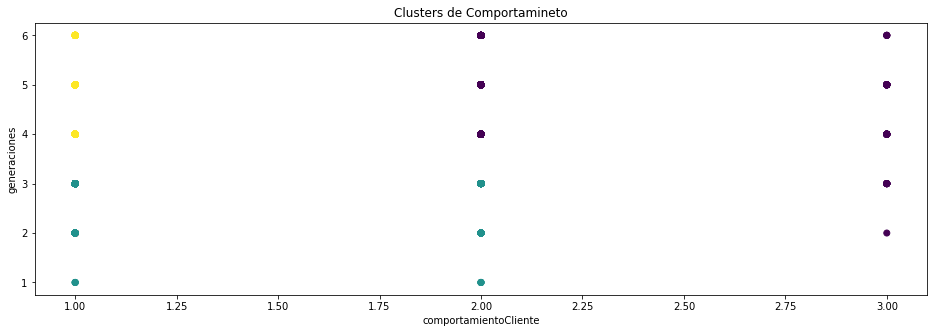

In [ ]:
# Guardar las etiquetas del clúster en el marco de datos
df2['cluster'] = hc.labels_
# Visualizar los clusters
plt.figure(figsize=(16,5))
plt.scatter(df2['comportamientoCliente'], df2['generaciones'], c = df2['cluster'])
plt.xlabel('comportamientoCliente')
plt.ylabel('generaciones')
plt.title('Clusters de Comportamineto');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


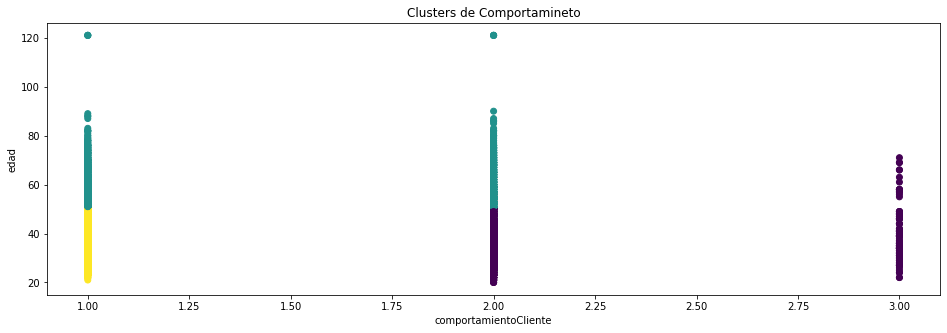

In [ ]:
# Guardar las etiquetas del clúster en el marco de datos
df2['cluster'] = hc.labels_
# Visualizar los clusters
plt.figure(figsize=(16,5))
plt.scatter(df2['comportamientoCliente'], df2['edad'], c = df2['cluster'])
plt.xlabel('comportamientoCliente')
plt.ylabel('edad')
plt.title('Clusters de Comportamineto');

In [ ]:
df3
df3.head()

,comportamientoCliente,edad,generaciones
17,ESTABLE,31.0,Millennials
23,ESTABLE,41.0,Generacion X
28,MUY ESTABLE,28.0,Millennials
31,MUY ESTABLE,48.0,Generacion X
33,ESTABLE,53.0,Baby Boom


In [ ]:
df3['comportamientoCliente'].replace(to_replace='MUY ESTABLE', value=1, inplace=True)
df3['comportamientoCliente'].replace(to_replace='ESTABLE', value=1, inplace=True)
df3['comportamientoCliente'].replace(to_replace='POCO ESTABLE', value=2, inplace=True)
df3['comportamientoCliente'].replace(to_replace='MUY INESTABLE', value=2, inplace=True)
df3['generaciones'].replace(to_replace='No Definido', value=0, inplace=True)
df3['generaciones'].replace(to_replace='Silent Generation', value=1, inplace=True)
df3['generaciones'].replace(to_replace='Baby Boom', value=1, inplace=True)
df3['generaciones'].replace(to_replace='Generacion X', value=2, inplace=True)
df3['generaciones'].replace(to_replace='Millennials', value=3, inplace=True)
df3['generaciones'].replace(to_replace='Centenials', value=3, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
df3

,comportamientoCliente,edad,generaciones
17,1,31.0,3
23,1,41.0,2
28,1,28.0,3
31,1,48.0,2
33,1,53.0,1
...,...,...,...
357543,1,34.0,3
357544,1,28.0,3
357548,1,60.0,1
357549,1,27.0,3


In [ ]:
df3.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
df3.isnull().sum()

comportamientoCliente    0
edad                     0
generaciones             0
dtype: int64

In [ ]:
# Instanciar escalador estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df3 = scaler.fit_transform(df3)

In [ ]:
# Instanciar agrupamiento
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df3)

AgglomerativeClustering()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


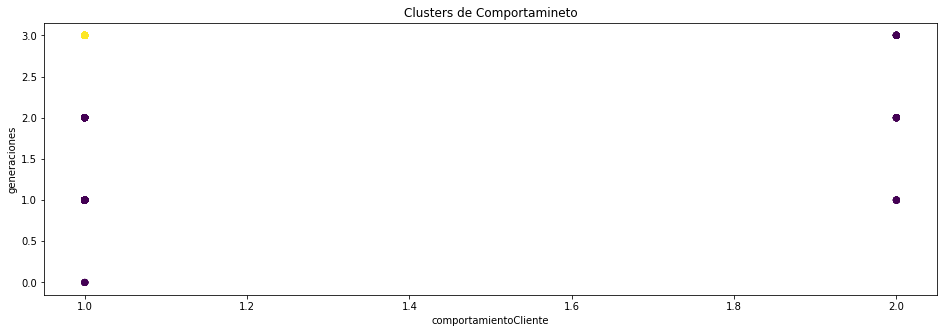

In [ ]:
# Guardar las etiquetas del clúster en el marco de datos
df3['cluster'] = hc.labels_
# Visualizar los clusters
plt.figure(figsize=(16,5))
plt.scatter(df3['comportamientoCliente'], df3['generaciones'], c = df3['cluster'])
plt.xlabel('comportamientoCliente')
plt.ylabel('generaciones')
plt.title('Clusters de Comportamineto');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


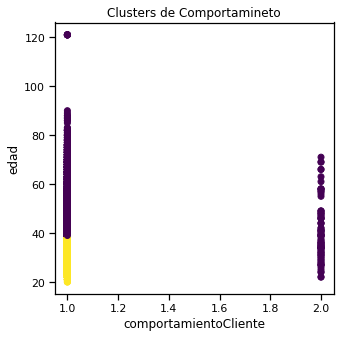

In [ ]:
# Guardar las etiquetas del clúster en el marco de datos
df3['cluster'] = hc.labels_
# Visualizar los clusters
plt.figure(figsize=(5,5))
plt.scatter(df3['comportamientoCliente'], df3['edad'], c = df3['cluster'])
plt.xlabel('comportamientoCliente')
plt.ylabel('edad')
plt.title('Clusters de Comportamineto');

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


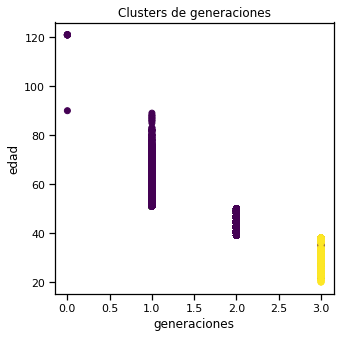

In [ ]:
# Guardar las etiquetas del clúster en el marco de datos
df3['cluster'] = hc.labels_
# Visualizar los clusters
plt.figure(figsize=(5,5))
plt.scatter(df3['generaciones'], df3['edad'], c = df3['cluster'])
plt.xlabel('generaciones')
plt.ylabel('edad')
plt.title('Clusters de generaciones');

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

Text(0.5, 1.0, 'Generaciones')

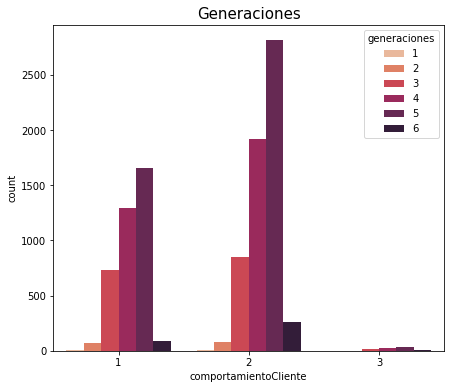

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot(x='comportamientoCliente',data=df1,hue = 'generaciones',palette='rocket_r')
sns.set_context('notebook')
plt.title("Generaciones", size =15)

Text(0.5, 1.0, 'Edad')

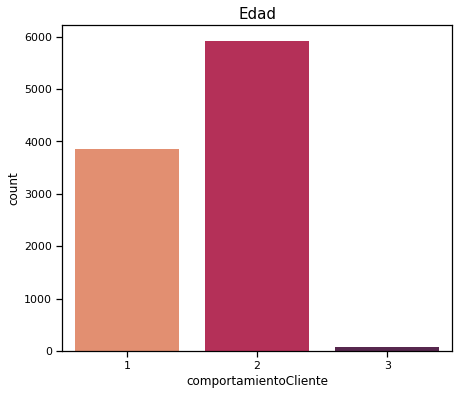

In [ ]:
plt.figure(figsize=(7,6))
sns.countplot(x='comportamientoCliente',data=df,palette='rocket_r')
sns.set_context('notebook')
plt.title("Edad", size =15)

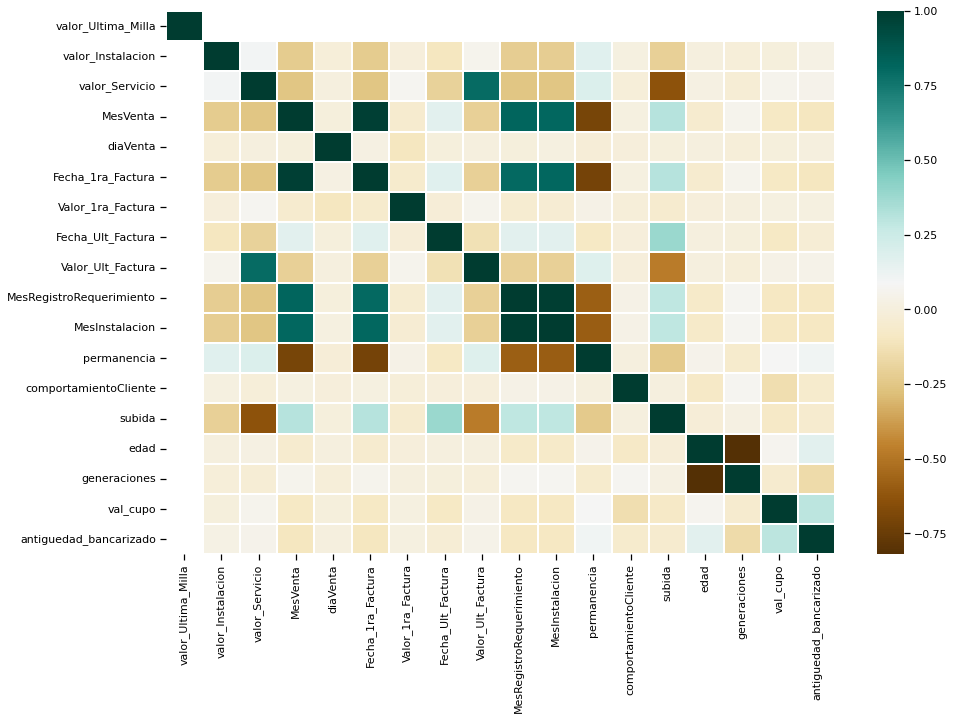

In [ ]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="BrBG", linewidths=.9)

In [ ]:
dfn = df.copy()

In [ ]:
dfn = dfn.iloc[:,1:]

In [ ]:
dfn_dummies = pd.get_dummies(dfn)

In [ ]:
dfn['comportamientoCliente'].replace(to_replace='MUY ESTABLE', value=1, inplace=True)
dfn['comportamientoCliente'].replace(to_replace='ESTABLE', value=1 , inplace=True)
dfn['comportamientoCliente'].replace(to_replace='POCO ESTABLE', value=0, inplace=True)
dfn['comportamientoCliente'].replace(to_replace='MUY INESTABLE', value=0, inplace=True)

In [ ]:
dfn.describe()

,valor_Ultima_Milla,valor_Instalacion,valor_Servicio,MesVenta,diaVenta,Fecha_1ra_Factura,Valor_1ra_Factura,Fecha_Ult_Factura,Valor_Ult_Factura,MesRegistroRequerimiento,MesInstalacion,permanencia,comportamientoCliente,subida,edad,generaciones,val_cupo,antiguedad_bancarizado
count,9861.0,9861.000000,9861.000000,9861.000000,9861.000000,9.861000e+03,9861.000000,9.861000e+03,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000,9861.000000
mean,0.0,30.324004,21.426086,201849.794240,16.387790,2.018528e+07,11.494241,2.021308e+07,20.413665,201867.429774,201870.172599,42.502180,1.617990,6717.245715,40.636852,4.334145,2276.123492,68.900517
std,0.0,23.965915,3.387105,111.580338,8.632026,1.116619e+04,6.924856,1.018245e+04,4.972314,113.233425,204.471885,21.720596,0.503534,1699.454180,11.406328,0.849173,4328.265928,52.451474
min,0.0,0.000000,0.000000,201206.000000,1.000000,2.012100e+07,0.590000,2.018010e+07,0.000000,201004.000000,201703.000000,0.000000,1.000000,1024.000000,20.000000,1.000000,0.000000,0.000000
25%,0.0,0.000000,20.000000,201711.000000,9.000000,2.017120e+07,6.190000,2.021040e+07,20.000000,201802.000000,201802.000000,27.000000,1.000000,5000.000000,32.000000,4.000000,0.000000,28.000000
50%,0.0,50.000000,20.000000,201812.000000,17.000000,2.018120e+07,11.350000,2.022030e+07,20.000000,201903.000000,201903.000000,41.000000,2.000000,8000.000000,39.000000,4.000000,213.420000,58.000000
75%,0.0,50.000000,24.000000,201911.000000,24.000000,2.019120e+07,16.670000,2.022030e+07,24.000000,202001.000000,202002.000000,53.000000,2.000000,8000.000000,47.000000,5.000000,3000.000000,101.000000
max,0.0,80.000000,240.240000,202103.000000,31.000000,2.022030e+07,240.240000,2.022030e+07,240.240000,202103.000000,218803.000000,259.000000,3.000000,40000.000000,121.000000,6.000000,48000.000000,494.000000


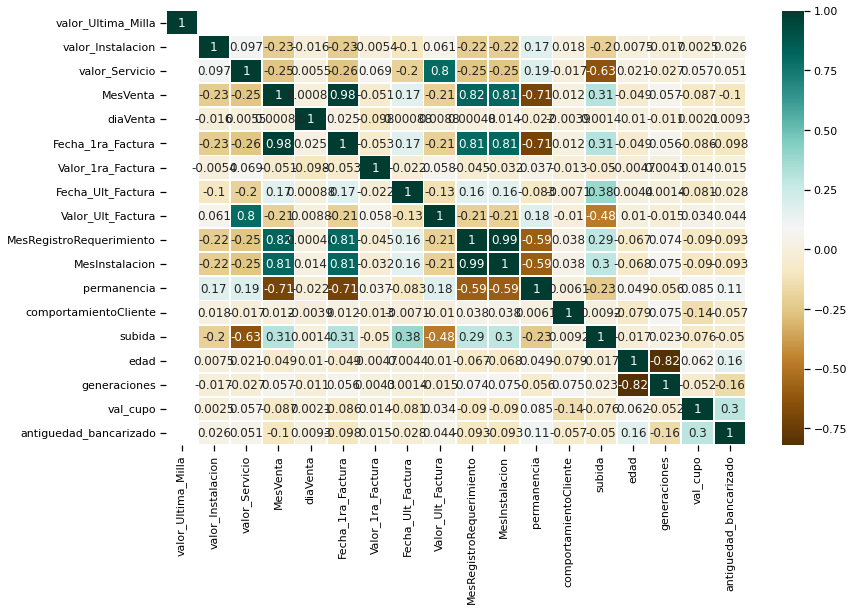

In [ ]:
corr = dfn.corr(method='kendall')
plt.figure(figsize=(13,8))
sns.heatmap(corr, annot=True, cmap="BrBG", linewidths=.9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


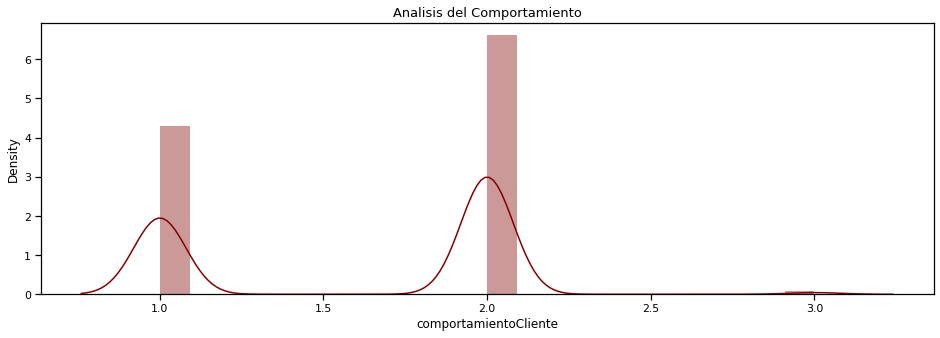

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df['comportamientoCliente'], color = 'maroon')
plt.title('Analisis del Comportamiento', size = 13)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
X = dfn_dummies.drop(columns = ['comportamientoCliente'])

In [ ]:
y = dfn_dummies['comportamientoCliente'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_predict = logreg.predict(X_test)

In [ ]:
accuracy_logreg = accuracy_score(y_predict, y_test)

In [ ]:
accuracy_logreg

0.7029401824940859

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conflog= confusion_matrix(y_test, y_predict)
conflog

array([[ 694,  471,    0],
       [ 384, 1386,    1],
       [   6,   17,    0]])

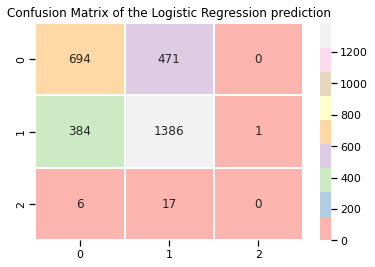

In [ ]:
sns.heatmap(conflog, annot=True, cmap="Pastel1", linewidths=.9, fmt='d')
plt.title('Confusion Matrix of the Logistic Regression prediction')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
scaled_df = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=10)
pcs = pca.fit_transform(scaled_df)

Text(0, 0.5, 'PC')

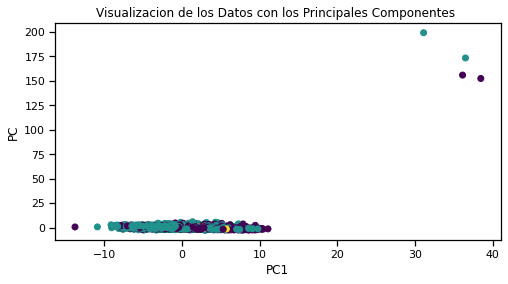

In [ ]:
# Visualiza los primeros 2 PC
plt.figure(figsize = (8, 4))
plt.scatter(pcs[:,0], pcs[:,1], c = y)
plt.title('Visualizacion de los Datos con los Principales Componentes ')
plt.xlabel('PC1')
plt.ylabel('PC')